In [33]:
#Import Dependencies
import gmaps 
import pandas as pd
import json
import requests 
from citipy import citipy
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress
from api_keys import weather_api_key,g_key
import numpy as np
from datetime import date

In [34]:
output_data_file = "output_data/cities.csv"
#Range of latitude and Longitude 
lat_range = (-90, 90)
lng_range = (-180, 180)


In [35]:
#Generate City Lists using CitiPy
#Create Lists to hold Laititude and Longitude and Cities
lat_lngs = []
cities = []

#Creat Random Lats and Lngs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify Nearest City 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    
    #only add unique cities
    if city not in cities:
        cities.append(city)
        
len(cities)

599

In [36]:
unites='imperial'
count = 1
City_name=[]
Temperature=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Latitude=[]
lng=[]

print('------------------------------')
print('Start of Records')
print('------------------------------')

for city in cities:
    try:
        url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={unites}'
        response=requests.get(url).json()
        City_name.append(response['name'])
        lng.append(response["coord"]['lon'])
        Latitude.append(response["coord"]["lat"])
        Temperature.append(response['main']['temp'])
        Humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        Cloudiness.append(response['clouds']['all'])
        print(f'City Record {count} of {len(cities)} complete. | Added {city}')
        count += 1
    
    except KeyError:
        print(f'Missing data in City Record {count} of {len(cities)}. | Skipping {city}')
        count += 1
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
Start of Records
------------------------------
City Record 1 of 599 complete. | Added dunedin
Missing data in City Record 2 of 599. | Skipping vaitupu
City Record 3 of 599 complete. | Added quatre cocos
City Record 4 of 599 complete. | Added rikitea
City Record 5 of 599 complete. | Added albany
City Record 6 of 599 complete. | Added sitka
City Record 7 of 599 complete. | Added novosergiyevka
City Record 8 of 599 complete. | Added manakara
City Record 9 of 599 complete. | Added bichura
City Record 10 of 599 complete. | Added nacogdoches
City Record 11 of 599 complete. | Added tiksi
City Record 12 of 599 complete. | Added warah
City Record 13 of 599 complete. | Added arraial do cabo
City Record 14 of 599 complete. | Added provideniya
City Record 15 of 599 complete. | Added mazamet
City Record 16 of 599 complete. | Added naze
City Record 17 of 599 complete. | Added airai
City Record 18 of 599 complete. | Added ucluelet
City Record 19 of 599 complete. | Adde

City Record 166 of 599 complete. | Added berlevag
City Record 167 of 599 complete. | Added riyadh
City Record 168 of 599 complete. | Added ahuimanu
City Record 169 of 599 complete. | Added saskylakh
City Record 170 of 599 complete. | Added kruisfontein
City Record 171 of 599 complete. | Added east london
City Record 172 of 599 complete. | Added kyzyl-suu
City Record 173 of 599 complete. | Added kang
City Record 174 of 599 complete. | Added acapulco
City Record 175 of 599 complete. | Added ponta do sol
City Record 176 of 599 complete. | Added aktash
Missing data in City Record 177 of 599. | Skipping lolua
City Record 178 of 599 complete. | Added limbe
City Record 179 of 599 complete. | Added san cristobal
City Record 180 of 599 complete. | Added lubao
City Record 181 of 599 complete. | Added illapel
City Record 182 of 599 complete. | Added simao
City Record 183 of 599 complete. | Added awbari
City Record 184 of 599 complete. | Added sept-iles
City Record 185 of 599 complete. | Added pon

City Record 329 of 599 complete. | Added zabid
City Record 330 of 599 complete. | Added jining
City Record 331 of 599 complete. | Added den helder
City Record 332 of 599 complete. | Added north platte
City Record 333 of 599 complete. | Added porto novo
City Record 334 of 599 complete. | Added kolokani
Missing data in City Record 335 of 599. | Skipping palabuhanratu
City Record 336 of 599 complete. | Added puerto leguizamo
City Record 337 of 599 complete. | Added broken hill
City Record 338 of 599 complete. | Added ejura
City Record 339 of 599 complete. | Added neka
City Record 340 of 599 complete. | Added te anau
City Record 341 of 599 complete. | Added great yarmouth
City Record 342 of 599 complete. | Added novikovo
Missing data in City Record 343 of 599. | Skipping amderma
City Record 344 of 599 complete. | Added gorgan
City Record 345 of 599 complete. | Added cookeville
City Record 346 of 599 complete. | Added sao filipe
City Record 347 of 599 complete. | Added capitao poco
City Rec

City Record 488 of 599 complete. | Added dawlatabad
City Record 489 of 599 complete. | Added lusambo
City Record 490 of 599 complete. | Added nantucket
City Record 491 of 599 complete. | Added hohhot
City Record 492 of 599 complete. | Added lloydminster
City Record 493 of 599 complete. | Added castellammare del golfo
City Record 494 of 599 complete. | Added turukhansk
City Record 495 of 599 complete. | Added beloha
City Record 496 of 599 complete. | Added saldanha
Missing data in City Record 497 of 599. | Skipping burica
City Record 498 of 599 complete. | Added xichang
City Record 499 of 599 complete. | Added gogrial
City Record 500 of 599 complete. | Added opuwo
City Record 501 of 599 complete. | Added kamenka
City Record 502 of 599 complete. | Added parfino
City Record 503 of 599 complete. | Added fukue
City Record 504 of 599 complete. | Added ryotsu
City Record 505 of 599 complete. | Added aitape
City Record 506 of 599 complete. | Added santa cruz
City Record 507 of 599 complete. | 

In [37]:
city_data_df = pd.DataFrame({'City': City_name,
                            'Temperature': Temperature,
                            'Humidity': Humidity,
                            'Cloudiness': Cloudiness,
                            'Wind Speed': Wind_Speed,
                            'Latitude': Latitude,
                            'Longitude': lng})

pd.DataFrame.to_csv(city_data_df, 'city_data.csv')
city_data_df

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Dunedin,47.95,73,69,1.01,-45.87,170.50
1,Quatre Cocos,77.40,83,90,6.33,-20.21,57.76
2,Rikitea,79.79,81,100,11.41,-23.12,-134.97
3,Albany,33.39,33,20,5.82,42.60,-73.97
4,Sitka,32.67,80,90,5.82,57.05,-135.33
...,...,...,...,...,...,...,...
538,Kalmunai,83.21,80,3,14.92,7.42,81.82
539,Teresina,82.40,78,75,5.82,-5.09,-42.80
540,Hofn,42.35,71,32,26.40,64.25,-15.21
541,Natal,86.90,66,75,8.05,-5.79,-35.21


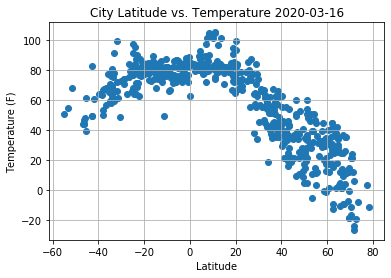

In [38]:
#Plot latitude vs temperature and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Temperature {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

The above Plot analyzes the Temperature for each city based on their Latitude.

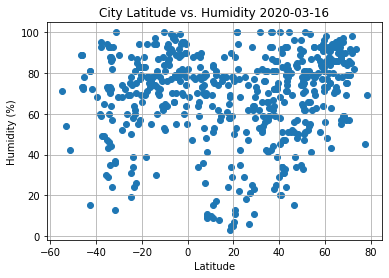

In [39]:
#Plot latitude vs humidity and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

The above Plot analyzes the Humidity levels for each city based on their Latitude.

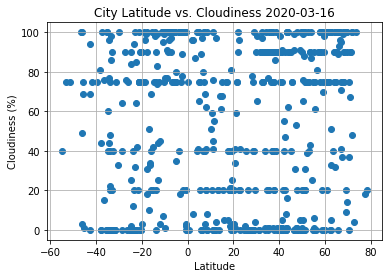

In [40]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

The above Plot analyzes the Cloudiness levels for each city based on their Latitude.

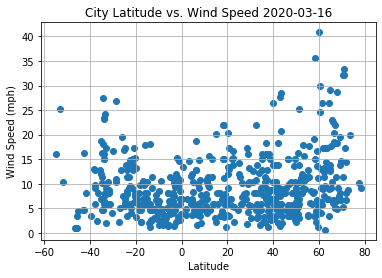

In [41]:
#Plot latitude vs wind speed and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed {date.today()}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')

The above Plot analyzes the Wind Speeds in miles per hour for each city based on their Latitude.

In [42]:
Northern_city_data_df=city_data_df.loc[(city_data_df["Latitude"] > 0)]
Northern_city_data_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
3,Albany,33.39,33,20,5.82,42.60,-73.97
4,Sitka,32.67,80,90,5.82,57.05,-135.33
5,Novosergiyevka,29.75,78,39,11.07,52.09,53.65
7,Bichura,28.31,78,76,7.25,50.59,107.60
8,Nacogdoches,55.78,100,90,8.05,31.60,-94.63


In [43]:
Southern_city_data_df=city_data_df.loc[(city_data_df["Latitude"] < 0)]
Southern_city_data_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Dunedin,47.95,73,69,1.01,-45.87,170.50
1,Quatre Cocos,77.40,83,90,6.33,-20.21,57.76
2,Rikitea,79.79,81,100,11.41,-23.12,-134.97
6,Manakara,76.55,85,0,4.07,-22.13,48.02
11,Arraial do Cabo,90.48,62,0,13.87,-22.97,-42.03


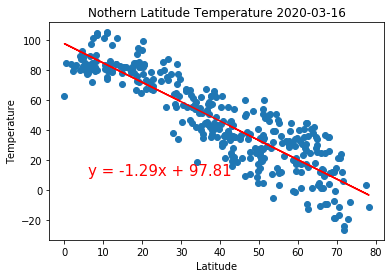

In [44]:
#Northern Hemisphere Temperature vs. Latitude
x_values = Northern_city_data_df['Latitude'].astype(float)
y_values = Northern_city_data_df['Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f'Nothern Latitude Temperature {date.today()}')
plt.show()

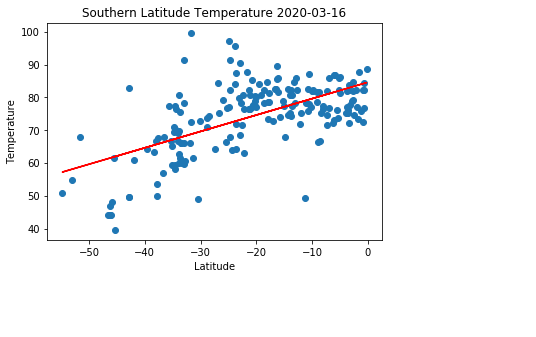

In [58]:
#Southern Latitude Temperature vs. Latitude
x_values = Southern_city_data_df['Latitude'].astype(float)
y_values = Southern_city_data_df['Temperature'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f'Southern Latitude Temperature {date.today()}')
plt.show()

After comparing both graphs it seems that the further you move from zero in either directions on the x-axis the lower the y-axis falls. So one could conclude that the further one moves from the equator in either direcion the colder it gets.

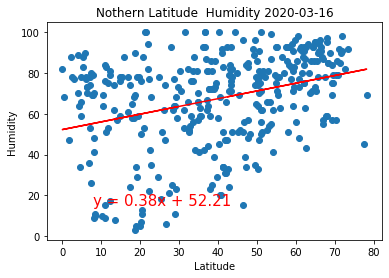

In [46]:
#Northern Hemisphere  Humidity vs. Latitude
x_values = Northern_city_data_df['Latitude'].astype(float)
y_values = Northern_city_data_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Nothern Latitude  Humidity {date.today()}')
plt.show()

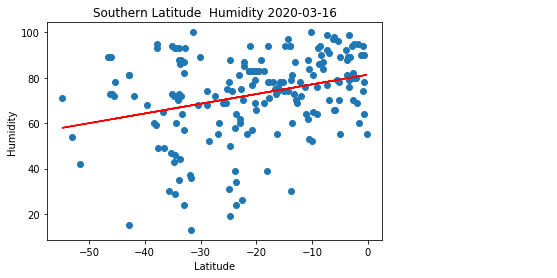

In [60]:
#Southern Hemisphere  Humidity vs. Latitude
x_values = Southern_city_data_df['Latitude'].astype(float)
y_values = Southern_city_data_df['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Latitude  Humidity {date.today()}')
plt.show()

Humidity Level are about the same in relation to latitude for both the Nothern and Southern Hemispheres

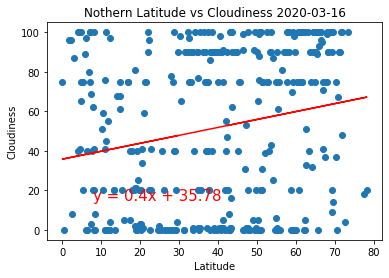

In [48]:
#Northern Hemisphere Cloudiness vs. Latitude
x_values = Northern_city_data_df['Latitude'].astype(float)
y_values = Northern_city_data_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Nothern Latitude vs Cloudiness {date.today()}')
plt.show()

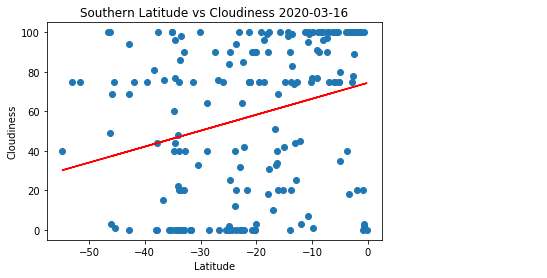

In [49]:
#Southern Hemisphere Cloudiness vs. Latitude
x_values = Southern_city_data_df['Latitude'].astype(float)
y_values = Southern_city_data_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Latitude vs Cloudiness {date.today()}')
plt.show()

Cloudiness is about the same in relation to latitude for both the Nothern and Southern Hemispheres.